In [2]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [11]:
from imutils import paths
import numpy as np

import argparse
import time
import sys
import cv2
import os
import matplotlib.pylab as plt
%matplotlib inline

(339, 366)


1

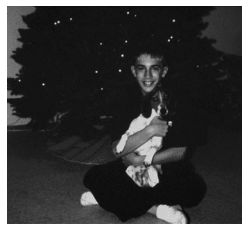

In [12]:
def dhash(image, hashSize=8):
    # resize the input image, adding a single column (width) so we
    # can compute the horizontal gradient
    resized = cv2.resize(image, (hashSize + 1, hashSize))
    # compute the (relative) horizontal gradient between adjacent
    # column pixels
    diff = resized[:, 1:] > resized[:, :-1]
    
#     plt.imshow(diff,'gray')
    diff_flat=diff.flatten()
#     print(diff_flat)
#     diff_flat[4:]=0*diff_flat[4:]
#     print(diff_flat,len(diff_flat))

    # convert the difference image to a hash
    return sum([2 ** i for (i, v) in enumerate(diff_flat) if v])


def hamming(a, b):
	# compute and return the Hamming distance between the integers
	return bin(int(a) ^ int(b)).count("1")


img = cv2.imread('pic1.jpg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
img = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(img,'gray')
plt.axis('off')
print(img.shape)

hamming(10, 8)

identical   148 598


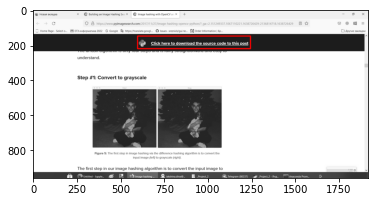

In [17]:
haystack = cv2.imread('screenshot.png')
needle = cv2.imread('pic1.jpg')
needle = cv2.imread('p2.png')
haystack  = cv2.cvtColor(haystack ,cv2.COLOR_BGR2GRAY)
needle = cv2.cvtColor(needle,cv2.COLOR_BGR2GRAY)
Dx,Dy= haystack.shape
dx,dy = needle.shape
for i in range(0,Dx-dx,4):    
#     print(f'i={i}')
    for j in range(0,Dy-dy,2): 
        img=haystack[i:i+dx,j:j+dy]  
        H = hamming(dhash(img), dhash(needle))
        if H<2:
                print ('identical  ',i,j)
                img1 = haystack                
                image=np.stack((img1,img1,img1),axis=-1)
                color=(255,0,0)
                thickness=5
                pt_min, pt_max=(j,i),(j+dy,i+dx)
                image = cv2.rectangle(image, pt_min, pt_max, color, thickness)
                plt.imshow(image)                

In [15]:
dx,dy

(72, 646)